导入pytorch

In [25]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

定义目标函数

In [26]:
def target_function(x):
    return 3*x**3+ x**2 + 2*x + 1

生成数据

In [27]:
np.random.seed(42)
x_train = np.random.uniform(-1, 1, 100)
y_train = target_function(x_train)
x_test = np.linspace(-1, 1, 100)
y_test = target_function(x_test)

转换为 PyTorch 张量

In [28]:
x_train_torch = torch.tensor(x_train, dtype=torch.float32).unsqueeze(1)
y_train_torch = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
x_test_torch = torch.tensor(x_test, dtype=torch.float32).unsqueeze(1)
y_test_torch = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

定义两层 ReLU 网络（PyTorch 实现）

In [29]:
class ReLUNet(nn.Module):
    def __init__(self):
        super(ReLUNet, self).__init__()
        self.fc1 = nn.Linear(1, 10)
        self.fc2 = nn.Linear(10, 1)
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

训练 PyTorch 模型

In [30]:
# 初始化 PyTorch 模型
model = ReLUNet()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.04)

# 训练 PyTorch 模型
epochs = 2000
loss_history = []

for epoch in range(epochs):
    optimizer.zero_grad()
    y_pred = model(x_train_torch)
    loss = criterion(y_pred, y_train_torch)
    loss.backward()
    optimizer.step()
    
    if epoch % 100 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item():.4f}')

    loss_history.append(loss.item())

# 预测（PyTorch）
with torch.no_grad():
    y_pred_torch = model(x_test_torch).numpy()

Epoch 0, Loss: 6.3531
Epoch 100, Loss: 0.0973
Epoch 200, Loss: 0.0205
Epoch 300, Loss: 0.0061
Epoch 400, Loss: 0.0055
Epoch 500, Loss: 0.0041
Epoch 600, Loss: 0.0040
Epoch 700, Loss: 0.0038
Epoch 800, Loss: 0.0037
Epoch 900, Loss: 0.0035
Epoch 1000, Loss: 0.0032
Epoch 1100, Loss: 0.0031
Epoch 1200, Loss: 0.0031
Epoch 1300, Loss: 0.0030
Epoch 1400, Loss: 0.0030
Epoch 1500, Loss: 0.0030
Epoch 1600, Loss: 0.0030
Epoch 1700, Loss: 0.0030
Epoch 1800, Loss: 0.0030
Epoch 1900, Loss: 0.0030


可视化结果

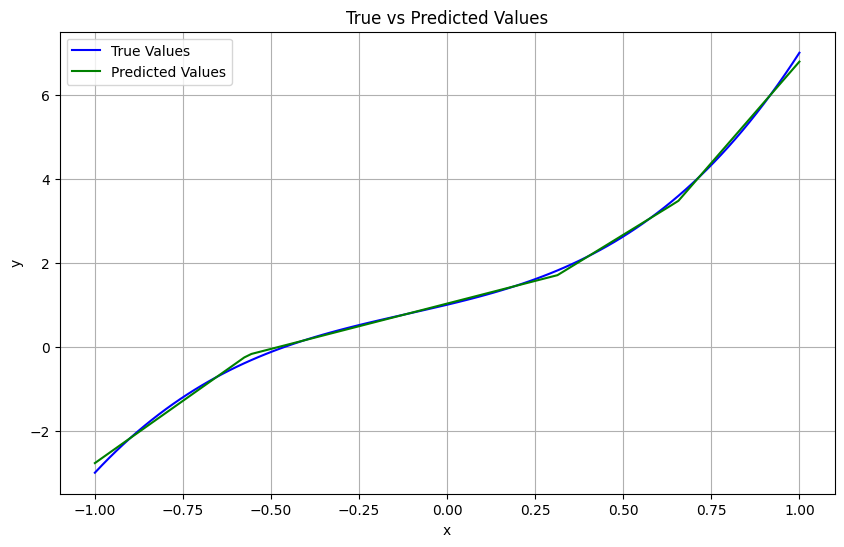

In [31]:
plt.figure(figsize=(10, 6))
plt.plot(x_test, y_test, label='True Values', color='blue')
plt.plot(x_test, y_pred_torch, label='Predicted Values', color='green')
plt.title('True vs Predicted Values')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()